This task is very similar to the previous one. The only difference is the method of measuring the accuracy. Rather than dividing set into train and test subsets, we will train the model on all but one record and test on the outcast.

In [ ]:
# Download mnist data
!pip install -q gdown httpimport
![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz

In [ ]:
# Necessary imports
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [ ]:
# Data preprocessing
with np.load('mnist.npz') as data:
    SAMPLE_SIZE = 5000
    imgs = [l.flatten() for l in data['train_data'][:SAMPLE_SIZE]]
    X = np.array([[imgs[i][j] / 255 for j in range(len(imgs[i]))] for i in range(len(imgs))])
    Y = data['train_labels'][:SAMPLE_SIZE]

Still choosing deterministic subset consisting of 5000 elements.

In [ ]:
# Check if the chosen subset of Mnist is diverse
values = [0] * 10
for i in Y: values[i] += 1
print(values)

[479, 563, 488, 493, 535, 434, 501, 550, 462, 495]


In [ ]:
# Main algorithm
avg_acc_for_k = []

for k in range(1, 11):
  acc_sum = 0
  for i in range(len(X)):
    X_train = np.delete(X, i, axis = 0)
    Y_train = np.delete(Y, i)

    X_test = X[i]
    Y_test = Y[i]

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(np.array(X_train).reshape(-1,28*28), Y_train)

    Y_test_pred = model.predict(np.array(X_test).reshape(-1,28*28))
    acc_sum += int((Y_test_pred[0] == Y_test))

  avg_acc_for_k.append(acc_sum / len(X))

  print(f"Average accuracy for k={k}: {round(avg_acc_for_k[k-1], 4)}")

Average accuracy for k=1: 0.9462
Average accuracy for k=2: 0.9312
Average accuracy for k=3: 0.9422
Average accuracy for k=4: 0.939
Average accuracy for k=5: 0.9394
Average accuracy for k=6: 0.9372
Average accuracy for k=7: 0.938
Average accuracy for k=8: 0.935
Average accuracy for k=9: 0.9346
Average accuracy for k=10: 0.933


Similarly to the previous task, the best results are for k = 1, although overall accuracy improved, which was expected (larger train set -> usually better results). Also k = 2 is still an outlier.

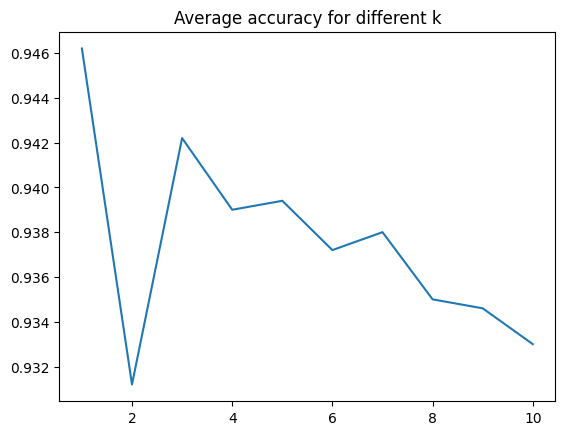

In [ ]:
# Plot of average accurancy for each k
plt.plot(range(1, 11), avg_acc_for_k)
plt.title(f"Average accuracy for different k")
plt.show()

We can see that the best results are for k = 1, but the accuracy is very similar across all k (in the previous task, differences between different values of k were larger).

author: Dominik Biernacki